In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

In [278]:
def get_data2(filename):    
    data = pd.read_csv(filename) #, names=["Interval","kWh"])
    return data

In [279]:
conso_file = r"\\192.168.0.175\pihome\Documents\conso2.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1124428 entries, 0 to 1124427
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Interval  1124428 non-null  int64  
 1   kWh       1124428 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 17.2 MB


In [280]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1124423    0.14
1124424    0.14
1124425    0.14
1124426    0.14
1124427    0.14
Name: kWh, Length: 1124428, dtype: float64

In [281]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1124423    0.14
1124424    0.14
1124425    0.14
1124426    0.14
1124427    0.14
Name: kWh, Length: 1124428, dtype: float64

In [282]:
l=len(conso_data)-1
l

1124427

In [283]:
conso_data['sec']=conso_data['Interval']/1000


In [284]:
conso_data['Wh']=3600000/conso_data['Interval']


In [285]:
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [286]:
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1124428 entries, 0 to 1124427
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Interval   1124428 non-null  int64  
 1   kWh        1124428 non-null  float64
 2   sec        1124428 non-null  float64
 3   Wh         1124428 non-null  float64
 4   cumul(ms)  1124428 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 42.9 MB


In [287]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
1124423,25573,0.14,25.573,140.773472,25970374983
1124424,25754,0.14,25.754,139.784111,25970400737
1124425,25485,0.14,25.485,141.259564,25970426222
1124426,25725,0.14,25.725,139.941691,25970451947
1124427,25505,0.14,25.505,141.148794,25970477452


In [288]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

25970477452000

In [289]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2023, 8, 21, 18, 39, 17, 739062)

In [290]:
conso_data['cumul(ms)'][conso_data['cumul(ms)'].isna()==True]

Series([], Name: cumul(ms), dtype: int64)

In [291]:
conso_data.iloc[0]


Interval     21934.00000
kWh              0.16000
sec             21.93400
Wh             164.12875
cumul(ms)    21934.00000
Name: 0, dtype: float64

In [292]:
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]


In [293]:
conso_data['dates']

0         2023-08-21 18:39:39.673062
1         2023-08-21 18:40:01.531062
2         2023-08-21 18:40:23.532062
3         2023-08-21 18:40:45.460062
4         2023-08-21 18:41:07.351062
                     ...            
1124423   2024-06-17 08:38:52.722062
1124424   2024-06-17 08:39:18.476062
1124425   2024-06-17 08:39:43.961062
1124426   2024-06-17 08:40:09.686062
1124427   2024-06-17 08:40:35.191062
Name: dates, Length: 1124428, dtype: datetime64[ns]

In [294]:
conso_data['days']= [d.strftime('%d/%m/%y') for d in conso_data['dates']]    
#[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 18:39:39.673062,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 18:40:01.531062,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 18:40:23.532062,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 18:40:45.460062,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 18:41:07.351062,21/08/23
...,...,...,...,...,...,...,...
1124423,25573,0.14,25.573,140.773472,25970374983,2024-06-17 08:38:52.722062,17/06/24
1124424,25754,0.14,25.754,139.784111,25970400737,2024-06-17 08:39:18.476062,17/06/24
1124425,25485,0.14,25.485,141.259564,25970426222,2024-06-17 08:39:43.961062,17/06/24
1124426,25725,0.14,25.725,139.941691,25970451947,2024-06-17 08:40:09.686062,17/06/24


In [295]:
# tranche journalière
now = datetime.now()
month = now.month
year = now.year
date = now.day
day = now.strftime('%d/%m/%y')    #str(now.month)+'-'+str(now.day)
day, date, month, year


('17/06/24', 17, 6, 2024)

In [296]:
here = now.strftime('%H:%M:%S')
here

'08:41:04'

In [297]:
conso_day = conso_data[conso_data['days']==day]
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [298]:
conso_day.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1123428 to 1124427
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1000 non-null   int64         
 1   kWh        1000 non-null   float64       
 2   sec        1000 non-null   float64       
 3   Wh         1000 non-null   float64       
 4   cumul(ms)  1000 non-null   int64         
 5   dates      1000 non-null   datetime64[ns]
 6   days       1000 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 62.5+ KB


In [299]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000


In [300]:
data = list(df_grp['kWh'])
print(data)


[0.895, 3.699, 4.22, 3.697, 4.211, 4.624, 3.484, 3.396, 3.53, 3.683, 3.84, 3.718, 4.257, 3.858, 3.42, 3.631, 3.326, 3.45, 4.239, 4.018, 4.06, 3.892, 3.444, 4.475, 3.7, 3.819, 4.416, 4.661, 3.725, 3.224, 3.171, 4.054, 3.626, 3.187, 3.79, 4.173, 3.743, 3.557, 4.819, 4.168, 4.536, 3.776, 3.378, 4.317, 3.881, 3.883, 3.429, 4.078, 3.651, 3.399, 4.11, 3.402, 3.89, 3.829, 3.648, 3.745, 4.244, 3.286, 3.885, 2.954, 2.056, 2.041, 2.482, 4.085, 3.74, 4.325, 3.638, 3.893, 3.747, 3.963, 3.931, 4.141, 3.667, 3.173, 3.756, 3.54, 3.596, 3.704, 3.685, 3.231, 3.908, 3.266, 3.748, 3.587, 4.105, 3.671, 3.26, 3.827, 4.096, 4.356, 4.09, 4.0, 4.213, 3.743, 3.932, 3.876, 3.91, 3.759, 4.028, 4.338, 3.88, 3.531, 3.667, 3.664, 3.338, 3.857, 3.985, 4.12, 3.464, 4.178, 3.607, 4.131, 4.489, 3.693, 3.41, 3.592, 4.2, 3.641, 4.08, 3.982, 3.756, 3.579, 5.147, 3.694, 3.765, 4.297, 4.083, 4.783, 4.396, 3.934, 3.813, 4.378, 4.621, 4.245, 4.776, 4.343, 3.663, 4.241, 3.685, 3.607, 3.528, 3.974, 3.632, 3.789, 3.591, 3.495, 3

In [301]:
# save to file
import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

In [302]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def show(day,pltcolor='darkcyan',bgcolor="ivory"):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
    #=[x.hour for x in conso_day['dates']]
    df= conso_day.set_index('heure')
    here = now.strftime('%H:%M:%S')
    conso_jour=len(df['kWh'])
    here, len(df)/1000, conso_jour

    # consommation d'une journée entière à partir de minuit
    # Set background color of the outer 
    # area of the plt
    #plt.figure(facecolor=fgcolor)
    fig, ax = plt.subplots(facecolor=pltcolor)
    
    major_ticks=300;minor_ticks=100
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
    # the size of A4 paper
    fig.set_size_inches(10, 5)
    
    # set bg color
    ax.set_facecolor(bgcolor)
    plt.plot(df['kWh'])
    #plt.plot(conso_day['heure'],conso_day['kWh'])
    plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
    plt.grid()
    plt.xticks(rotation=30);


In [303]:
def conso_byhour(day):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))

    conso_hours = conso_day.copy()
    conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
    conso_hours#.info()
    # group by hour
    groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
    groupedbyhour.count()
    len(groupedbyhour)
    x = np.arange(1,len(groupedbyhour)+1)

    #groupedbyhour.count().plot(grid=True,xticks=x)
    plt.figure(figsize=(12, 8),facecolor='darkcyan')
    values = groupedbyhour.count().kWh
    #ax = plt.bar(x,groupedbyhour.count().kWh)
    ax = values.plot(kind="bar",color='green',width=.8)
    ax.set_facecolor('antiquewhite')
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) - {day}')
    plt.xlim(-1,len(x)+1)
    plt.xticks(rotation=30);
    
    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in values]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",
            fontfamily='calibri', fontsize=16, fontweight='bold', color='blue'
        )
    
    

In [304]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.312736
dtype: float64

In [305]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.723272
dtype: float64

In [306]:
last=df_grp.iloc[-1]['kWh']
last

1.0

In [307]:
conso_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1123428 to 1124427
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1000 non-null   int64         
 1   kWh        1000 non-null   float64       
 2   sec        1000 non-null   float64       
 3   Wh         1000 non-null   float64       
 4   cumul(ms)  1000 non-null   int64         
 5   dates      1000 non-null   datetime64[ns]
 6   days       1000 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 62.5+ KB


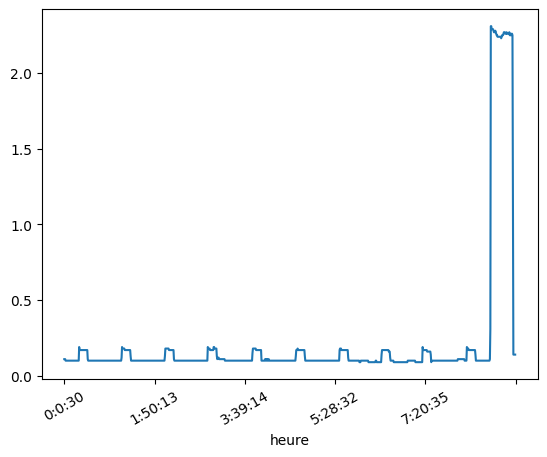

In [308]:
conso_day=conso_data[conso_data['days']==day].copy()  # no more error
conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
df.tail(2000)['kWh'].plot()
plt.xticks(rotation=30);

In [309]:
conso_day['heure']


1123428     0:0:30
1123429      0:1:3
1123430     0:1:37
1123431     0:2:11
1123432     0:2:45
            ...   
1124423    8:38:52
1124424    8:39:18
1124425    8:39:43
1124426     8:40:9
1124427    8:40:35
Name: heure, Length: 1000, dtype: object

In [310]:
df_byhour = df[['days','kWh']].groupby('heure', sort=False)
list(df_byhour)

[('0:0:30',
              days   kWh
  heure                 
  0:0:30  17/06/24  0.11),
 ('0:1:3',
             days   kWh
  heure                
  0:1:3  17/06/24  0.11),
 ('0:1:37',
              days   kWh
  heure                 
  0:1:37  17/06/24  0.11),
 ('0:2:11',
              days  kWh
  heure                
  0:2:11  17/06/24  0.1),
 ('0:2:45',
              days  kWh
  heure                
  0:2:45  17/06/24  0.1),
 ('0:3:20',
              days  kWh
  heure                
  0:3:20  17/06/24  0.1),
 ('0:3:54',
              days  kWh
  heure                
  0:3:54  17/06/24  0.1),
 ('0:4:28',
              days  kWh
  heure                
  0:4:28  17/06/24  0.1),
 ('0:5:3',
             days  kWh
  heure               
  0:5:3  17/06/24  0.1),
 ('0:5:37',
              days  kWh
  heure                
  0:5:37  17/06/24  0.1),
 ('0:6:12',
              days  kWh
  heure                
  0:6:12  17/06/24  0.1),
 ('0:6:47',
              days  kWh
  heure          

In [311]:
kwh_byhour = list(df_byhour['kWh'])
kwh_byhour

[('0:0:30',
  heure
  0:0:30    0.11
  Name: kWh, dtype: float64),
 ('0:1:3',
  heure
  0:1:3    0.11
  Name: kWh, dtype: float64),
 ('0:1:37',
  heure
  0:1:37    0.11
  Name: kWh, dtype: float64),
 ('0:2:11',
  heure
  0:2:11    0.1
  Name: kWh, dtype: float64),
 ('0:2:45',
  heure
  0:2:45    0.1
  Name: kWh, dtype: float64),
 ('0:3:20',
  heure
  0:3:20    0.1
  Name: kWh, dtype: float64),
 ('0:3:54',
  heure
  0:3:54    0.1
  Name: kWh, dtype: float64),
 ('0:4:28',
  heure
  0:4:28    0.1
  Name: kWh, dtype: float64),
 ('0:5:3',
  heure
  0:5:3    0.1
  Name: kWh, dtype: float64),
 ('0:5:37',
  heure
  0:5:37    0.1
  Name: kWh, dtype: float64),
 ('0:6:12',
  heure
  0:6:12    0.1
  Name: kWh, dtype: float64),
 ('0:6:47',
  heure
  0:6:47    0.1
  Name: kWh, dtype: float64),
 ('0:7:23',
  heure
  0:7:23    0.1
  Name: kWh, dtype: float64),
 ('0:7:58',
  heure
  0:7:58    0.1
  Name: kWh, dtype: float64),
 ('0:8:33',
  heure
  0:8:33    0.1
  Name: kWh, dtype: float64),
 ('0:9:8',


In [312]:
df

,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:30,33507,0.11,33.507,107.440236,25939272600,2024-06-17 00:00:30.339062,17/06/24
0:1:3,33180,0.11,33.180,108.499096,25939305780,2024-06-17 00:01:03.519062,17/06/24
0:1:37,33768,0.11,33.768,106.609808,25939339548,2024-06-17 00:01:37.287062,17/06/24
0:2:11,34313,0.10,34.313,104.916504,25939373861,2024-06-17 00:02:11.600062,17/06/24
0:2:45,34326,0.10,34.326,104.876770,25939408187,2024-06-17 00:02:45.926062,17/06/24
...,...,...,...,...,...,...,...
8:38:52,25573,0.14,25.573,140.773472,25970374983,2024-06-17 08:38:52.722062,17/06/24
8:39:18,25754,0.14,25.754,139.784111,25970400737,2024-06-17 08:39:18.476062,17/06/24
8:39:43,25485,0.14,25.485,141.259564,25970426222,2024-06-17 08:39:43.961062,17/06/24


In [313]:
# premier kWh
if len(df)>1000:
    df.iloc[1000]['dates']

In [314]:
df.iloc[0].dates

Timestamp('2024-06-17 00:00:30.339062')

In [315]:
df.dates.dt.time

heure
0:0:30     00:00:30.339062
0:1:3      00:01:03.519062
0:1:37     00:01:37.287062
0:2:11     00:02:11.600062
0:2:45     00:02:45.926062
                ...       
8:38:52    08:38:52.722062
8:39:18    08:39:18.476062
8:39:43    08:39:43.961062
8:40:9     08:40:09.686062
8:40:35    08:40:35.191062
Name: dates, Length: 1000, dtype: object

In [316]:
def period(p=1):
    if p==1:
        start = df.iloc[0].dates
    else:
        start = df.iloc[(p-1)*1000-1].dates
    if len(df)>p*1000:
        end = df.iloc[p*1000-1].dates
        conso = p*1000
    else:
        end = df.iloc[len(df)-1].dates
        conso = len(df) - (p-1)*1000
    period = end - start  # type timedelta
    hours = int(period / dt.timedelta(hours=1))
    mins = int(period / dt.timedelta(minutes=1)) - hours*60
    secs = int(period / dt.timedelta(seconds=1)) - hours*3600 - mins*60

    #df.iloc[1001:2000]['dates']#.tail(1)
    #print(period)
    print(f'{start}\t{end}\t{hours}h {mins}m {secs}s \t{conso}')


In [317]:
tranches = len(df)//1000
tranches+1

2

In [318]:
# temps de conso par tranches de 1kwh
for p in range(1,tranches+2):  # les 5 tranches de kWh consommés
    if len(df)>(p-1)*1000:
        period(p)

2024-06-17 00:00:30.339062	2024-06-17 08:40:35.191062	8h 40m 4s 	1000


In [319]:
# conso temps réel
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour

('08:41:04', 1.0, 1000)

In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0:0:30 to 8:40:35
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1000 non-null   int64         
 1   kWh        1000 non-null   float64       
 2   sec        1000 non-null   float64       
 3   Wh         1000 non-null   float64       
 4   cumul(ms)  1000 non-null   int64         
 5   dates      1000 non-null   datetime64[ns]
 6   days       1000 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 94.8+ KB


In [321]:
def from_csv(csv_file):    
    df = pd.read_csv(csv_file)
    return df
    
def to_csv(csv_file, df):
    df.to_csv(csv_file, index=False)

In [322]:
df_grp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 21/08/23 to 17/06/24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kWh     302 non-null    float64
dtypes: float64(1)
memory usage: 4.7+ KB


In [323]:
df_grp.to_csv('df_grp.csv')
df.to_csv('df.csv')

In [324]:
df_grp.tail(7)

,kWh
days,
11/06/24,3.782
12/06/24,3.273
13/06/24,3.330
14/06/24,3.167
15/06/24,2.967
16/06/24,3.701
17/06/24,1.000


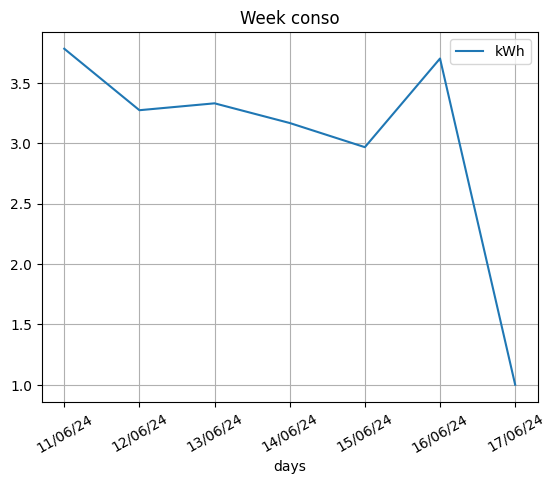

In [325]:
# last week conso
df_grp.tail(7).plot(grid=True)
plt.title('Week conso')
plt.xticks(rotation=30);

In [326]:
current=plt.get_current_fig_manager()
current.set_window_title('Conso by day')
#help(current.canvas)
#,facecolor='darkcyan')

<Figure size 640x480 with 0 Axes>

In [327]:
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#plt.style.use('dark_background')


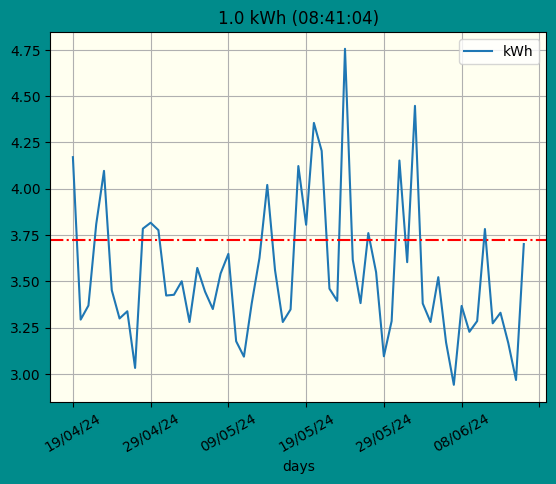

In [328]:
# pandas plot the day consos in the group
fig, ax = plt.subplots(facecolor='darkcyan')  # as argument
#or fig.patch.set_facecolor('darkcyan') # This changes the grey to white
ax.set_facecolor("ivory")

# 2 last months
df_grp.iloc[-60:-1].plot(grid=True,ax=ax, y=["kWh"])   #df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar", ax=ax)
plt.title(str(last)+' kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


In [329]:
df_grp.mean()

kWh    3.723272
dtype: float64

In [330]:
#df_grp.head()
df_grp.tail(7)

,kWh
days,
11/06/24,3.782
12/06/24,3.273
13/06/24,3.330
14/06/24,3.167
15/06/24,2.967
16/06/24,3.701
17/06/24,1.000


In [331]:
# max min during last month
#print(df_grp.iloc[-31:-1])
df_grp.iloc[-31:-1].describe()


,kWh
count,30.000000
mean,3.579200
std,0.453524
min,2.941000
25%,3.281250
50%,3.427000
75%,3.776500
max,4.755000


In [332]:
month = df_grp.iloc[-31:-1]['kWh']
print(month.idxmax(), max(month))
print(month.idxmin(), min(month))

24/05/24 4.755
07/06/24 2.941


In [333]:
day

'17/06/24'

In [334]:
conso_day

,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
1123428,33507,0.11,33.507,107.440236,25939272600,2024-06-17 00:00:30.339062,17/06/24,0:0:30
1123429,33180,0.11,33.180,108.499096,25939305780,2024-06-17 00:01:03.519062,17/06/24,0:1:3
1123430,33768,0.11,33.768,106.609808,25939339548,2024-06-17 00:01:37.287062,17/06/24,0:1:37
1123431,34313,0.10,34.313,104.916504,25939373861,2024-06-17 00:02:11.600062,17/06/24,0:2:11
1123432,34326,0.10,34.326,104.876770,25939408187,2024-06-17 00:02:45.926062,17/06/24,0:2:45
...,...,...,...,...,...,...,...,...
1124423,25573,0.14,25.573,140.773472,25970374983,2024-06-17 08:38:52.722062,17/06/24,8:38:52
1124424,25754,0.14,25.754,139.784111,25970400737,2024-06-17 08:39:18.476062,17/06/24,8:39:18
1124425,25485,0.14,25.485,141.259564,25970426222,2024-06-17 08:39:43.961062,17/06/24,8:39:43
1124426,25725,0.14,25.725,139.941691,25970451947,2024-06-17 08:40:09.686062,17/06/24,8:40:9


In [335]:
#add hours column
conso_hours = conso_day.copy()
conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
conso_hours.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1123428 to 1124427
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1000 non-null   int64         
 1   kWh        1000 non-null   float64       
 2   sec        1000 non-null   float64       
 3   Wh         1000 non-null   float64       
 4   cumul(ms)  1000 non-null   int64         
 5   dates      1000 non-null   datetime64[ns]
 6   days       1000 non-null   object        
 7   heure      1000 non-null   object        
 8   hours      1000 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 78.1+ KB


In [336]:
# group conso of the day by hour
groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
list(groupedbyhour)

[('00',
          hours   kWh
  1123428    00  0.11
  1123429    00  0.11
  1123430    00  0.11
  1123431    00  0.10
  1123432    00  0.10
  ...       ...   ...
  1123531    00  0.10
  1123532    00  0.10
  1123533    00  0.10
  1123534    00  0.10
  1123535    00  0.10
  
  [108 rows x 2 columns]),
 ('01',
          hours  kWh
  1123536    01  0.1
  1123537    01  0.1
  1123538    01  0.1
  1123539    01  0.1
  1123540    01  0.1
  ...       ...  ...
  1123640    01  0.1
  1123641    01  0.1
  1123642    01  0.1
  1123643    01  0.1
  1123644    01  0.1
  
  [109 rows x 2 columns]),
 ('02',
          hours   kWh
  1123645    02  0.10
  1123646    02  0.10
  1123647    02  0.10
  1123648    02  0.10
  1123649    02  0.10
  ...       ...   ...
  1123753    02  0.17
  1123754    02  0.17
  1123755    02  0.17
  1123756    02  0.17
  1123757    02  0.17
  
  [113 rows x 2 columns]),
 ('03',
          hours   kWh
  1123758    03  0.17
  1123759    03  0.19
  1123760    03  0.19
  1123761 

In [337]:
groupedbyhour.count()

,kWh
hours,
00,108
01,109
02,113
03,114
04,109
05,108
06,104
07,107
08,128


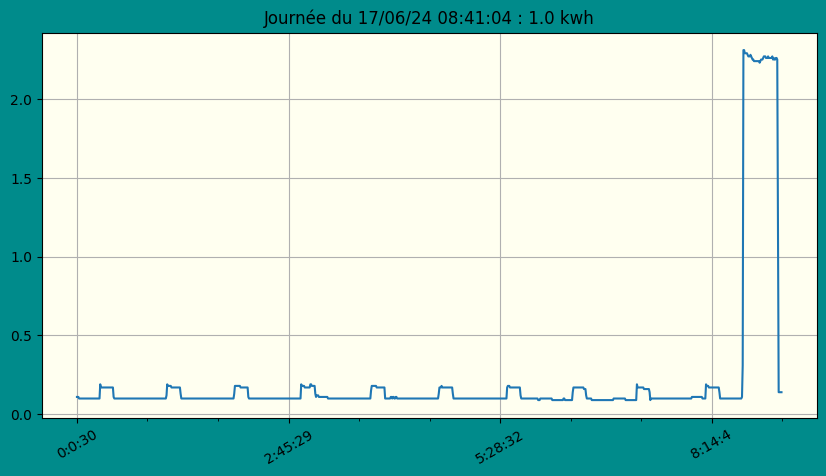

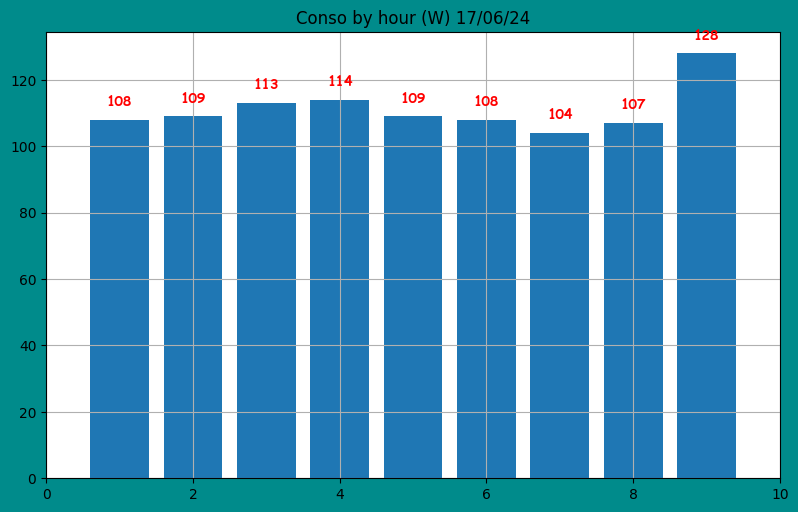

In [338]:
show(day,bgcolor='ivory')
data = groupedbyhour.count().kWh
#len(groupedbyhour)
x = np.arange(1,len(groupedbyhour)+1)
ymax = max(data)+5
#groupedbyhour.count().plot(grid=True,xticks=x)
fig, ax = plt.subplots(figsize=(8, 5), facecolor='darkcyan')

plt.bar(x,data)
plt.grid()
plt.tight_layout()
plt.title(f'Conso by hour (W) {day}')
plt.xlim(0,len(x)+1)
#plt.xticks(rotation=30);
#plt.ylim(0,ymax)

rects = ax.patches

# Make some labels.
labels = [f"{i}" for i in data]
fontfamily = {'calibri', 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom",
        fontfamily=fontfamily, fontsize=10, fontweight='bold', color='red'
    )


In [339]:
import os
os.listdir(path='.')

['.git',
 '.ipynb_checkpoints',
 '5_days_meteo.ipynb',
 '8days.json',
 '8days.pkl',
 'advanced_expression.ipynb',
 'alphabeta_tree.ipynb',
 'amlich.ipynb',
 'amlich5.ipynb',
 'amlich_data.py',
 'amlich_functions.py',
 'amlich_lib.py',
 'AntPath.ipynb',
 'Apple.csv',
 'astronomie_def.ipynb',
 'atom_electronic_configuration.ipynb',
 'bar_label.ipynb',
 'bell_curve.ipynb',
 'bitcoin_api.ipynb',
 'bitmap_convert.ipynb',
 'bitmap_structure.ipynb',
 'CAC40.csv',
 'chess_board.ipynb',
 'coindesk_api_client.ipynb',
 'collections.ipynb',
 'colormaps.ipynb',
 'conso.txt',
 'conso_by_hour.ipynb',
 'conso_data.csv',
 'conso_jour.csv',
 'conso_jour.png',
 'conso_kwh.ipynb',
 'conso_kwh_reduced.ipynb',
 'conso_par_jour.csv',
 'covid19_france.ipynb',
 'cryptography_fernet.ipynb',
 'csv_readwrite.ipynb',
 'curves.ipynb',
 'dash_app001.ipynb',
 'data_correlation.ipynb',
 'data_temp16122022.csv',
 'dateformatter.ipynb',
 'date_formatter_pandas.ipynb',
 'decimals_pi_plot.ipynb',
 'decorator_kwargs_change

In [340]:
# list to store files
res = []
# Iterate directory
for file in os.listdir('.'):
    # check only text files
    if file.endswith('.csv'):
        res.append(file)
        print(file)
#print(res)

Apple.csv
CAC40.csv
conso_data.csv
conso_jour.csv
conso_par_jour.csv
data_temp16122022.csv
demain.csv
df.csv
df_grp.csv
DowJones.csv
EURUSD.csv
Ford.csv
karaoke.csv
ligue1_2020_27.csv
Nasdaq.csv
Nikkei.csv
planete.csv
saturn_bodies.csv
saturn_rings.csv
SMSSpamCollection.csv
table-indicateurs-open-data-dep-2023-06-30-17h59.csv
table-indicateurs-open-data-france-2023-06-30-17h59.csv
temp_humidity.csv
Tesla.csv
titanic.csv
Toyota.csv
VNDUSD.csv
WA_Fn-UseC_-Telco-Customer-Churn.csv
week.csv


In [341]:
#conso_byhour(day)

In [342]:
# save to file
import pickle
path = r'../consobyhour.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

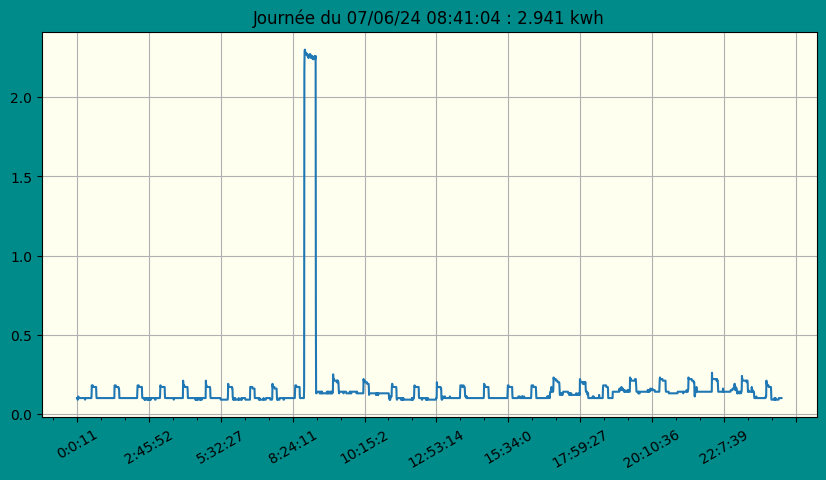

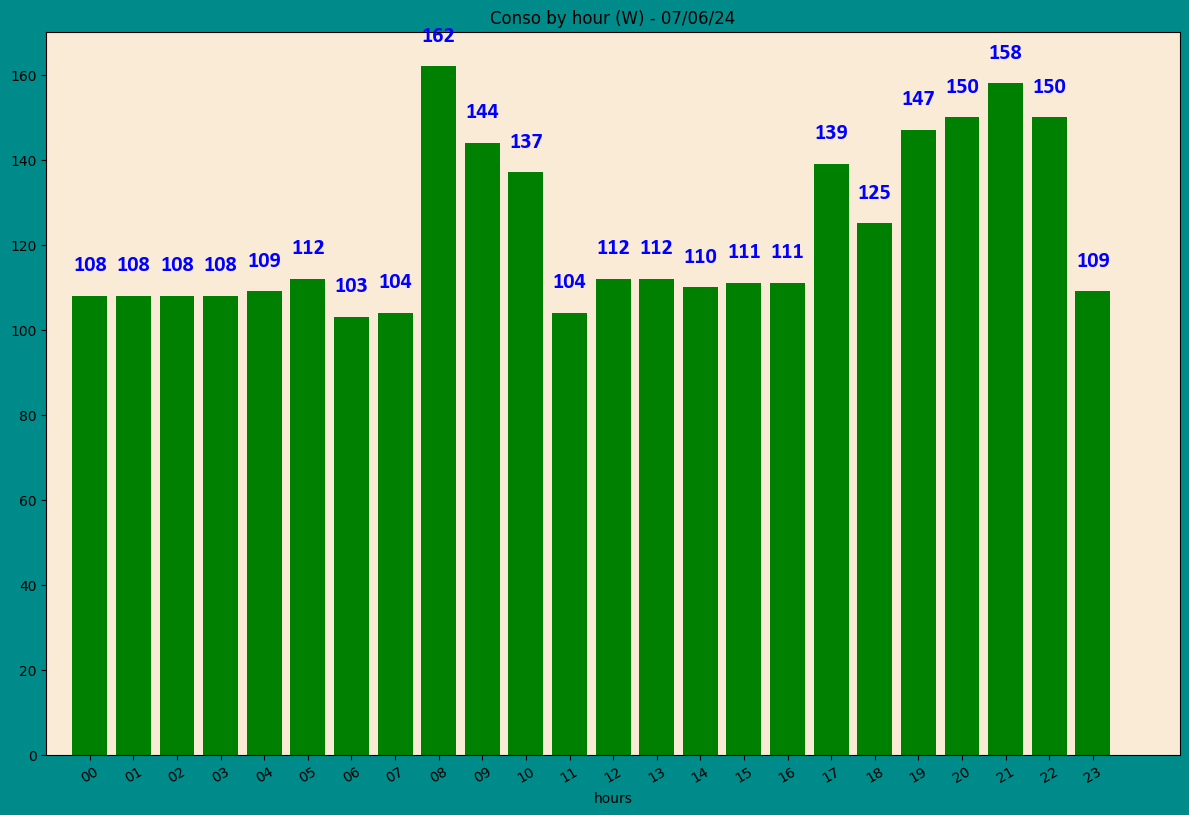

In [343]:
# plot any day
day = '07/06/24'
show(day,pltcolor='darkcyan')
conso_byhour(day)

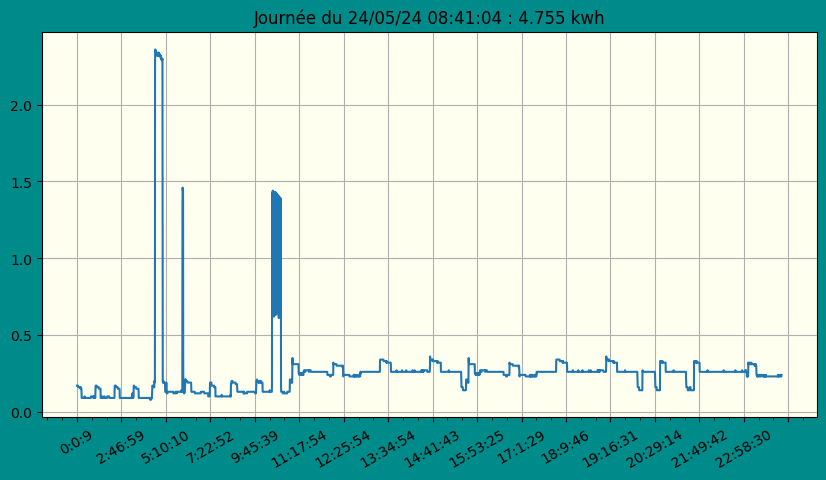

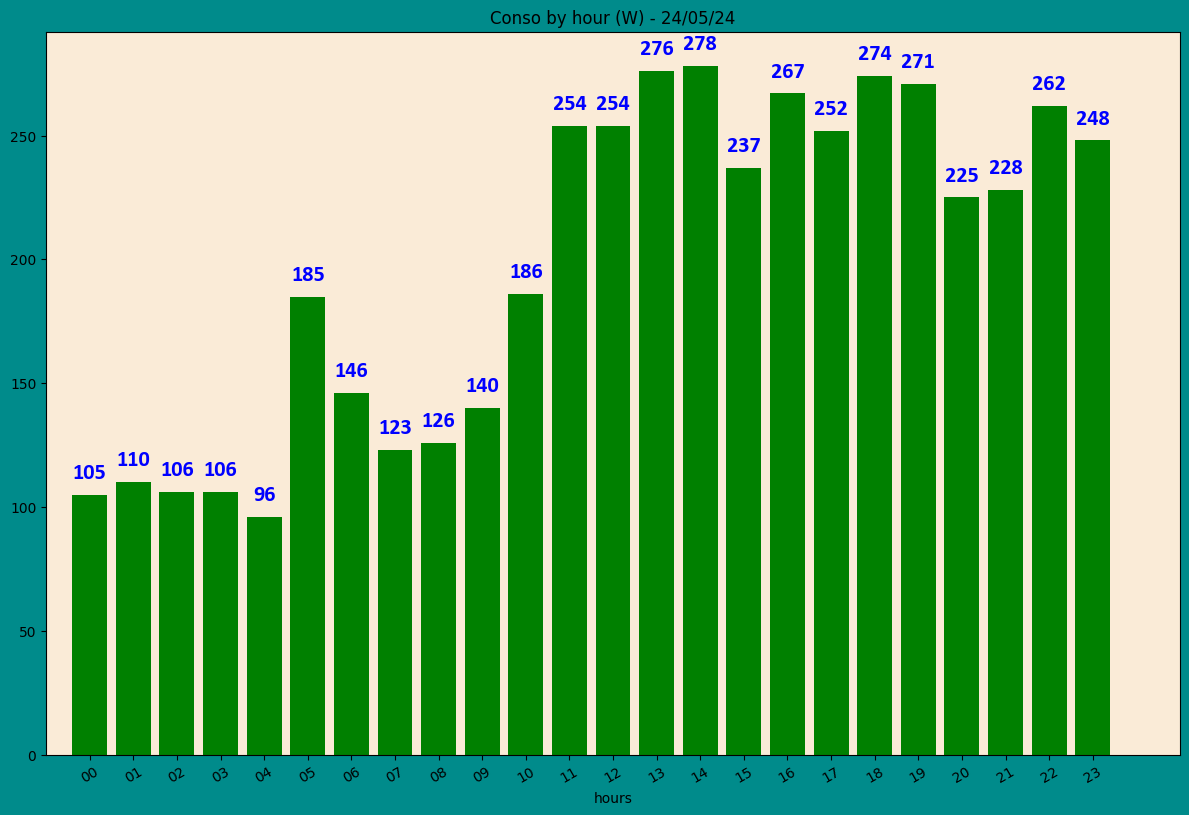

In [344]:
# plot day max conso (télévision de 11h à 23h)
day = month.idxmax()
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [345]:
filename='conso_data.csv'
conso_data.to_csv(filename)